# Artificial and Computational Intelligence Assignment 1 - PS5 - Group 185

## Problem solving by Uninformed & Informed Search - Insurance premium dataset

List only the BITS (Name) of active contributors in this assignment:
1. Rajeev Aditya Musuunuri (2022AC05638)

# Import Libraries/Dataset

### 1.	Define the environment in the following block

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("./insurance.csv")

# Data Visualization and Exploration

### 1. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


**There are 1338 data points in this dataset, 6 independent features, and 1 target feature.**

### 2. Comment on class imbalance with appropriate visualization method.

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**The dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.**

**We have the categories listed below in our data.**

*Continuous - age, bmi, charges.*

*Discrete - sex, children, smoker, region.*

In [ ]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### 3. Provide appropriate visualizations to get an insight about the dataset

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

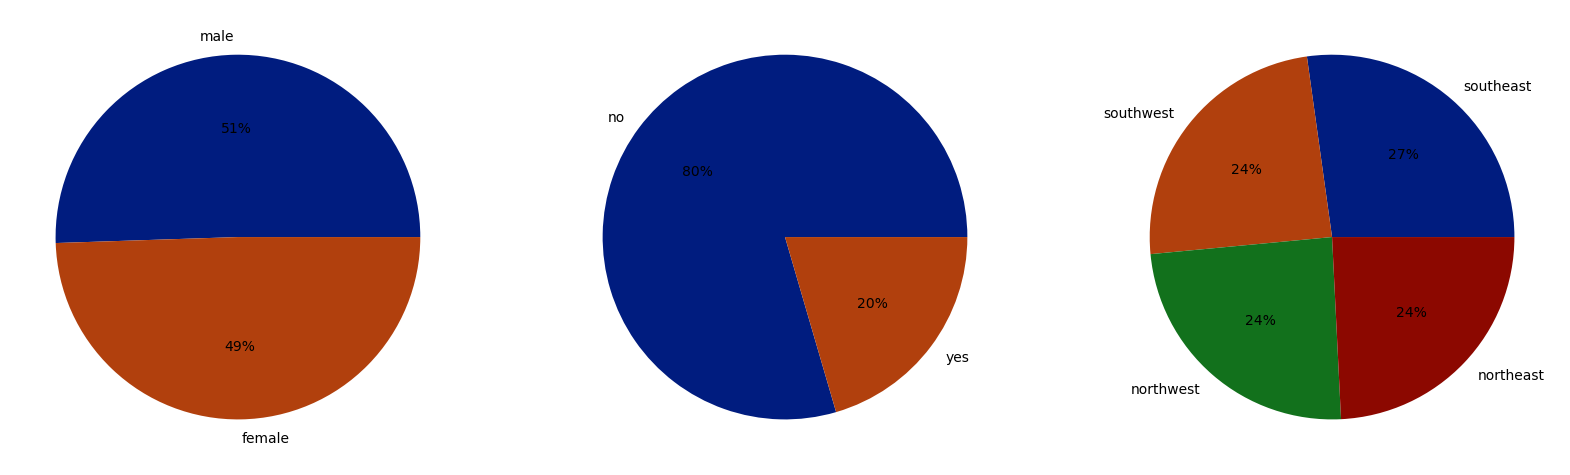

In [ ]:
features = ['sex', 'smoker', 'region']
palette_color = sb.color_palette('dark')

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 3, i + 1)

	x = data[col].value_counts()
	plt.pie(x.values, labels=x.index, colors=palette_color, autopct='%.0f%%')

plt.show()


*** ***

**While the sex and region columns of the data are equally distributed, we can see an 80:20 ratio in the smoker column.**

*** ***

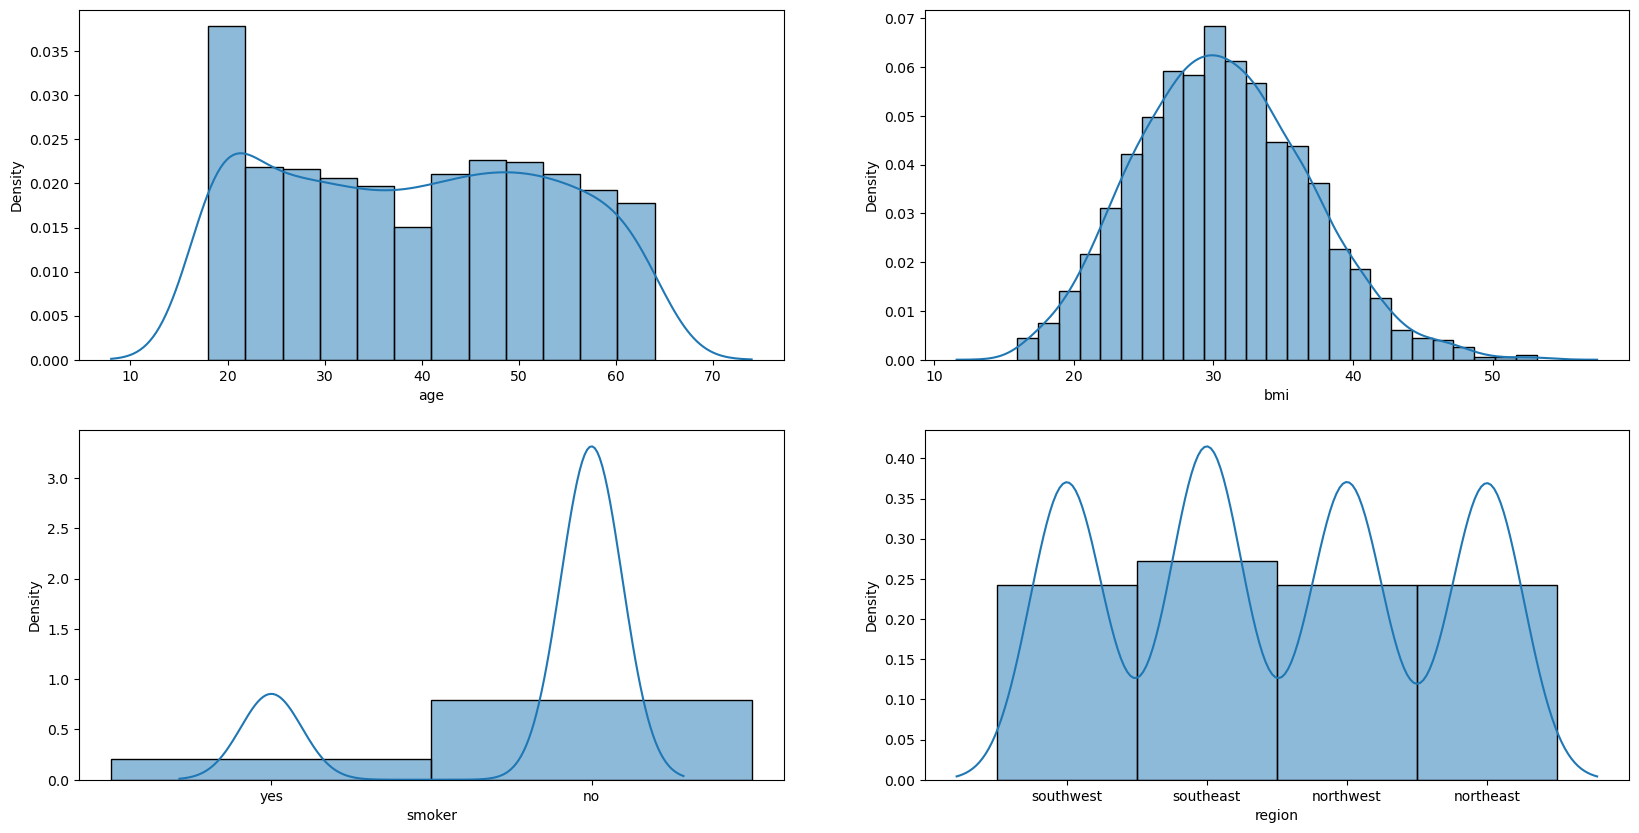

In [ ]:
features = ['age', 'bmi','smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sb.histplot(data[col], stat='density', kde=True, kde_kws={"cut": 3})
plt.show()



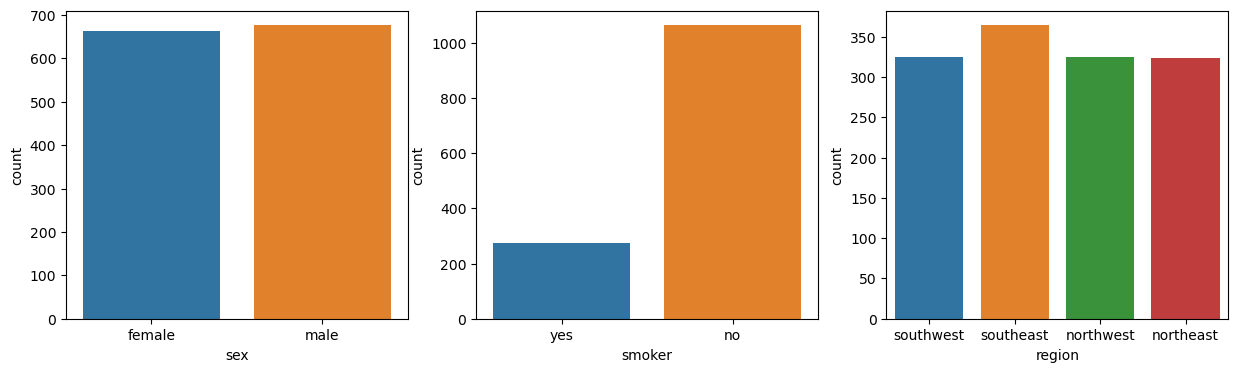

In [ ]:
# Explore nominal features
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
sb.countplot(x='sex', data=data, ax=ax[0])
sb.countplot(x='smoker', data=data, ax=ax[1])
sb.countplot(x='region', data=data, ax=ax[2])
plt.show()

Analysis of the scatter plot.

- We can determine whether there is a general correlation between age and medical costs and whether there are differences between smokers and non-smokers in this relationship. When there are additional characteristics that could influence the relationship, such as smoking status in this case, scatter plots can be a valuable tool for examining the relationship between two numerical variables. Box Plot interpretation.


- The y-axis of the boxplot shows medical costs, and the x-axis the number of children. The interquartile range (IQR), or range of values between the 25th and 75th percentiles of the data, is depicted by the box in the middle of the plot. The median is shown by the line inside the box.

- The data range, excluding any outliers, is shown by the whiskers that extend from the box. Outliers are shown as distinct spots outside of the whiskers.

- We can see how the median and range of medical expenses change with the number of children a person has by specifying the 'children' feature with the x parameter and the 'expenses' feature with the y parameter. This can be used to find any patterns or trends in the data, such as whether parents of more children typically have greater medical costs.




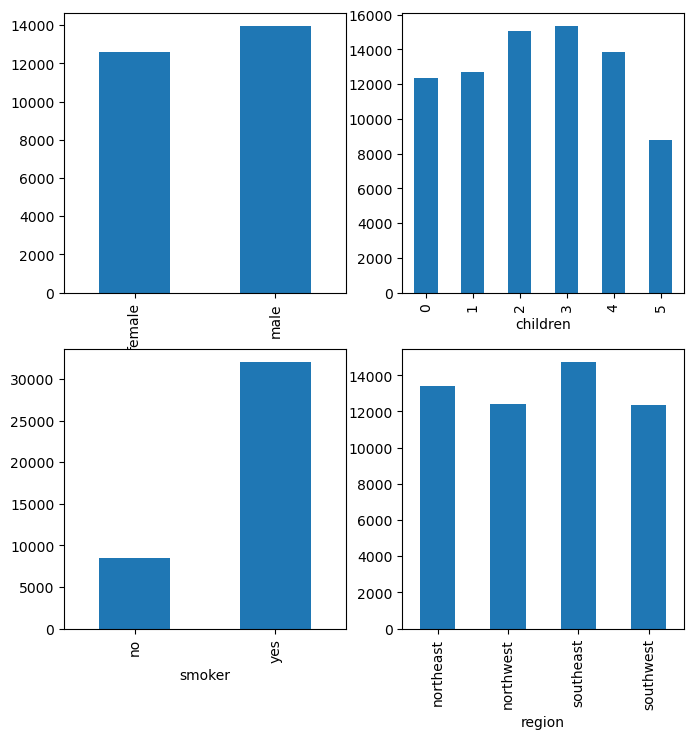

In [ ]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(8, 8))
for i, col in enumerate(features):
	plt.subplot(2, 2, i + 1)
	data.groupby(col).mean()['charges'].plot.bar()
plt.show()


In [ ]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

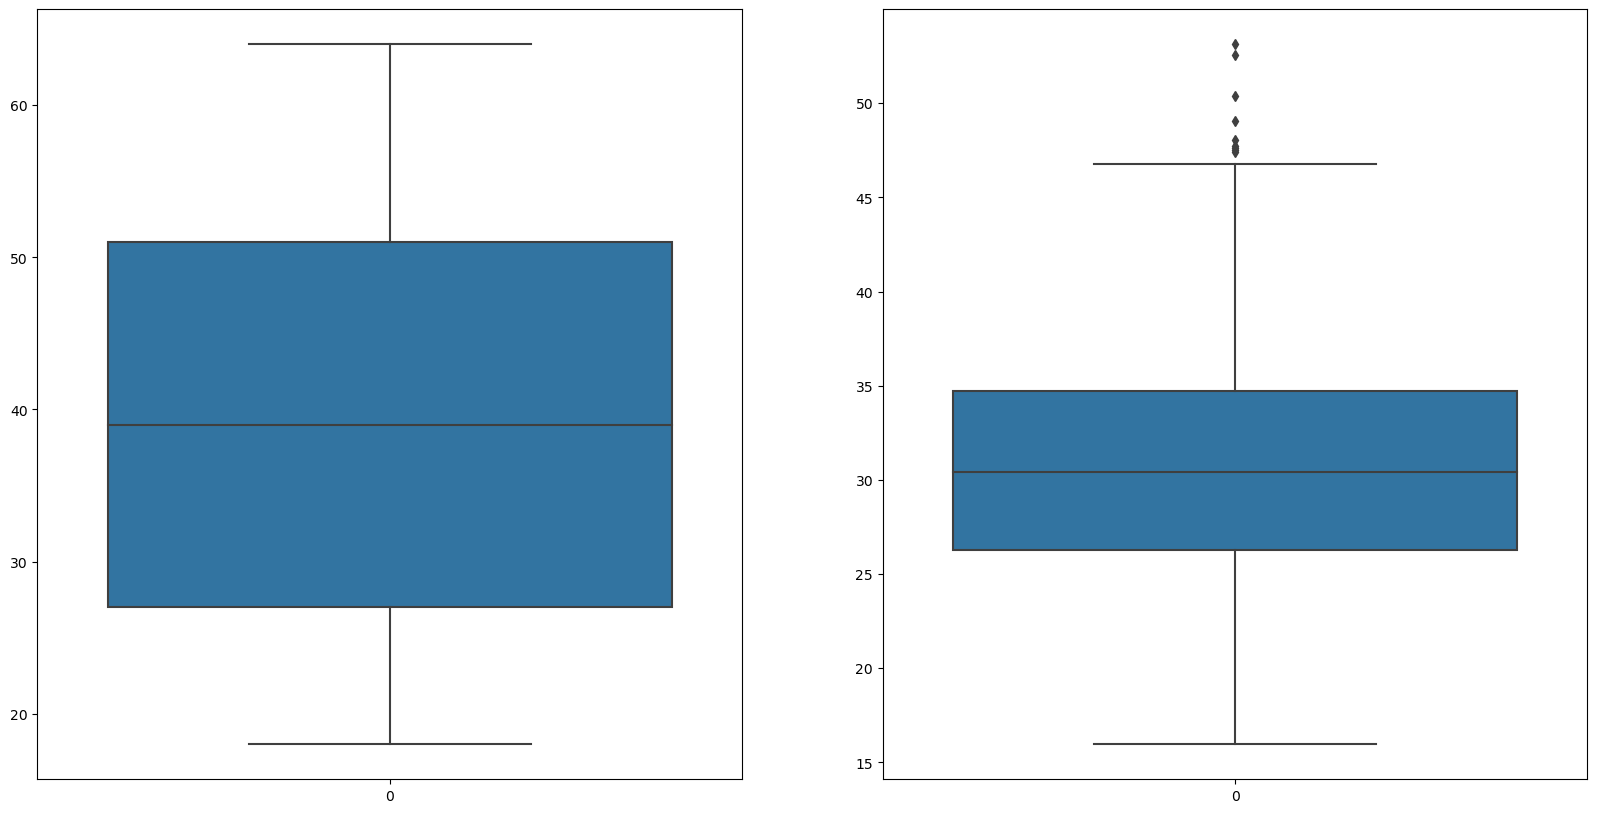

In [ ]:
features = ['age', 'bmi']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sb.boxplot(data[col])
plt.show()


*** ***

**Males pay slightly more in fees than girls do, although the gap is not very large.**

**The premium that smokers pay is roughly three times what non-smokers pay.**

**The four specified regions have almost the same prices.**

**Data points are almost evenly distributed among regions, with a small but not so significat hike in southeast and its apperently having effect on charges.**

*** ***

**The BMI column of the given dataset contains outliers.**

In [ ]:
(data.groupby('smoker').size()/data['smoker'].count())*100

smoker
no     79.521674
yes    20.478326
dtype: float64

**smokers contribute to 20% data**

### 4. Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis affect the feature selection that you will perform in the next step? Justify your answer 

**To analyze the correlation between the features of this dataset we must perform the LabelEncoding of the categorical columns.** 

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

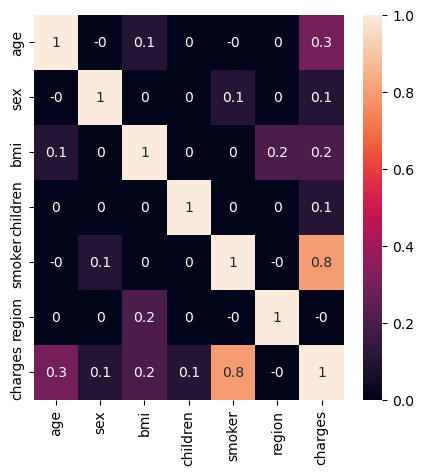

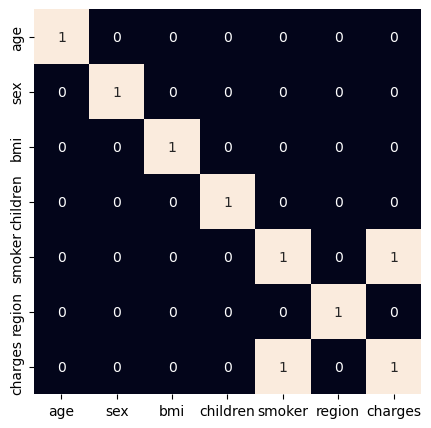

In [ ]:
for col in data.columns:
	if data[col].dtype == object:
		le = LabelEncoder()
		data[col] = le.fit_transform(data[col])

#correltion matrix without any thershold
plt.figure(figsize=(5, 5))
sb.heatmap(data.corr().round(1),annot=True)


#correltion greater than 0.8 to find significant features
plt.figure(figsize=(5, 5))
sb.heatmap(data.corr().round(1) >= 0.8,
		annot=True,
		cbar=False)

plt.show()


**The heatmap shown above makes it obvious that there are no strongly related features here.**

**However smoking has good correlation with premium charges.**

**Age and BMI does have correlation but are weakly correlated.**

*** ***

### 5. Any other visualisation specific to the problem statement.

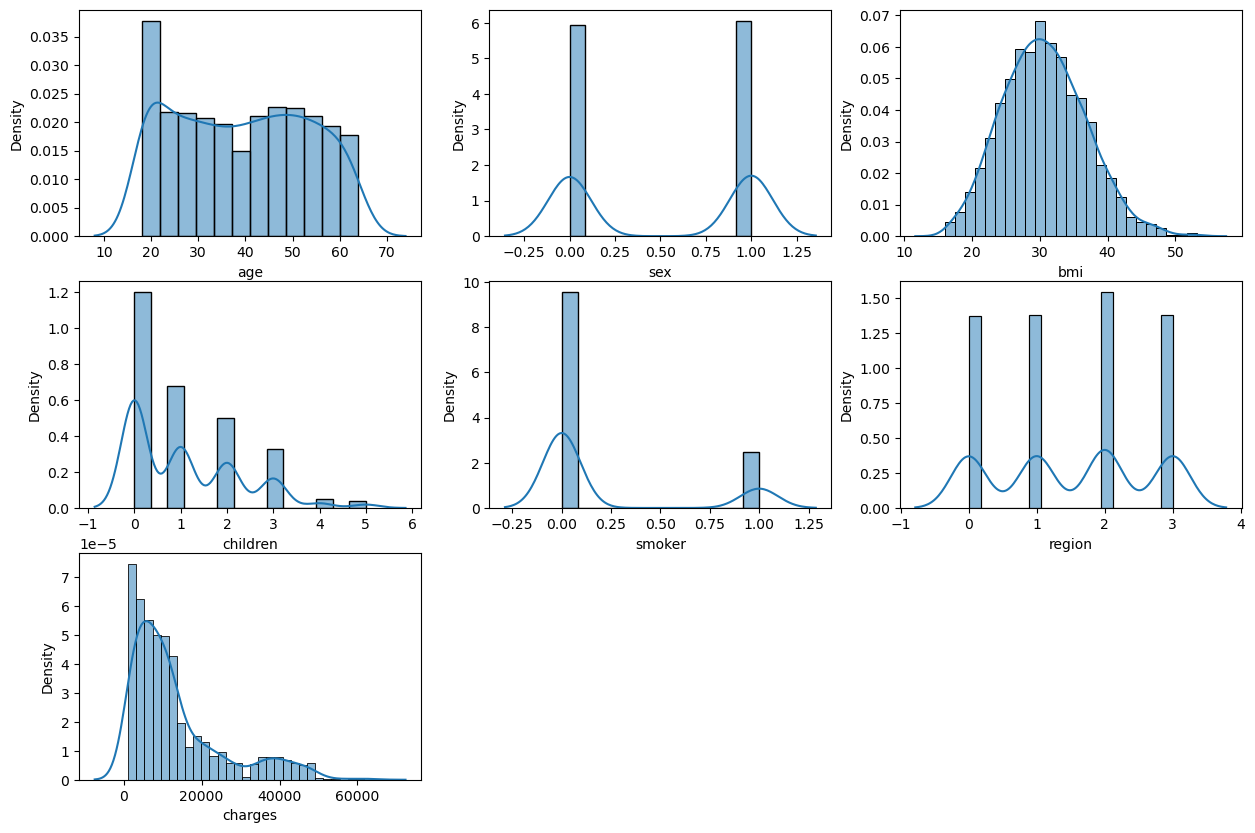

In [ ]:
features = ['sex', 'children', 'smoker', 'region']
plt.subplots(figsize=(15, 10))

for i, col in enumerate(data.columns):
    plt.subplot(3,3,i+1)
    sb.histplot(data[col], stat='density', kde=True, kde_kws={"cut": 3})
plt.show()

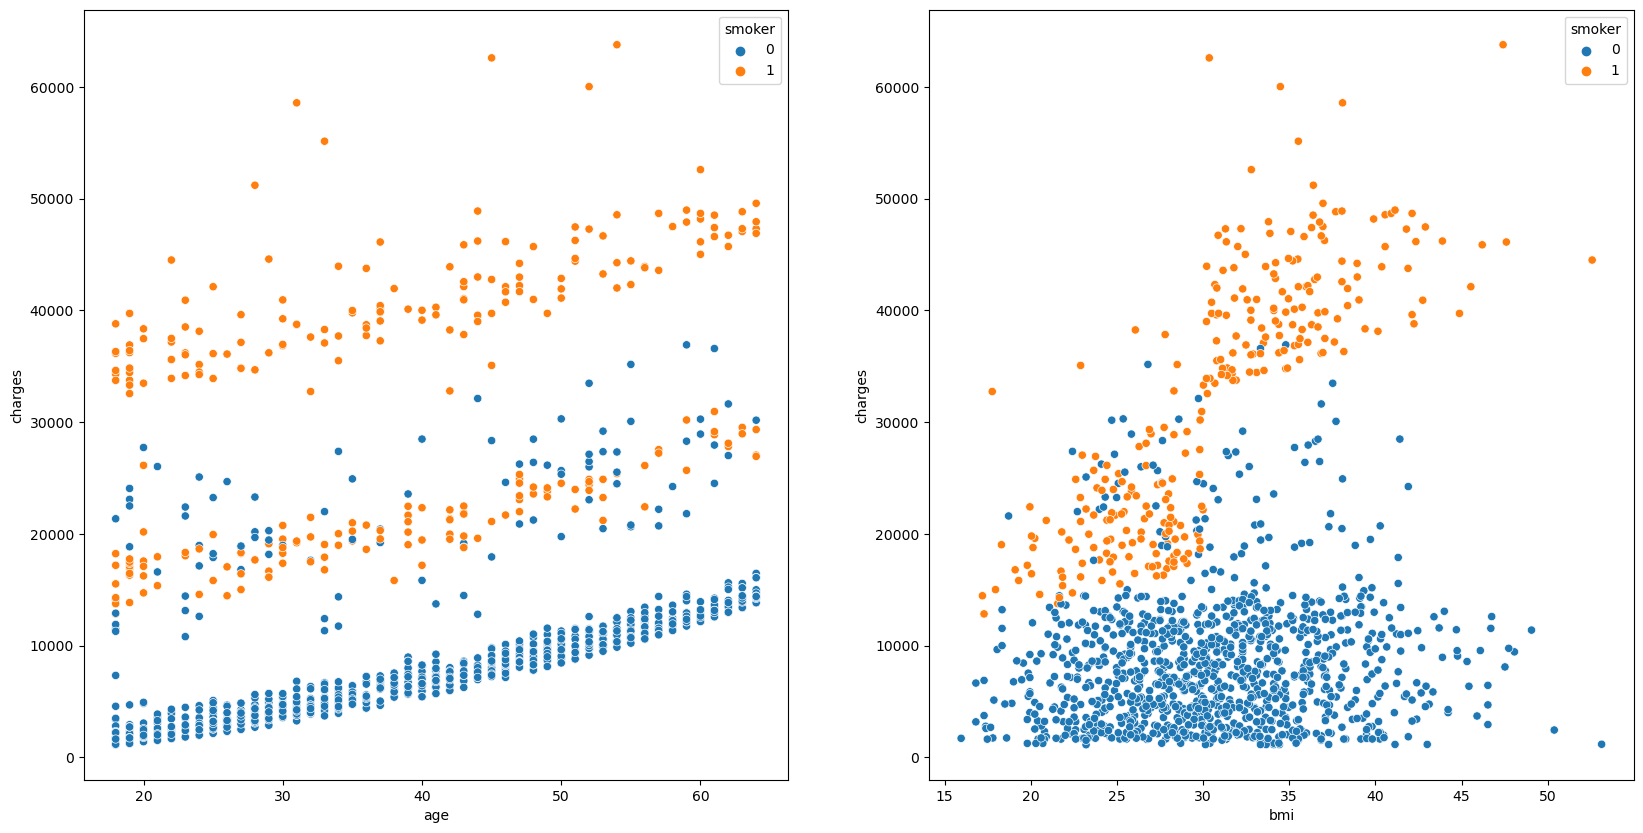

In [ ]:
features = ['age', 'bmi']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sb.scatterplot(data=data, x=col,
				y='charges',
				hue='smoker')
plt.show()

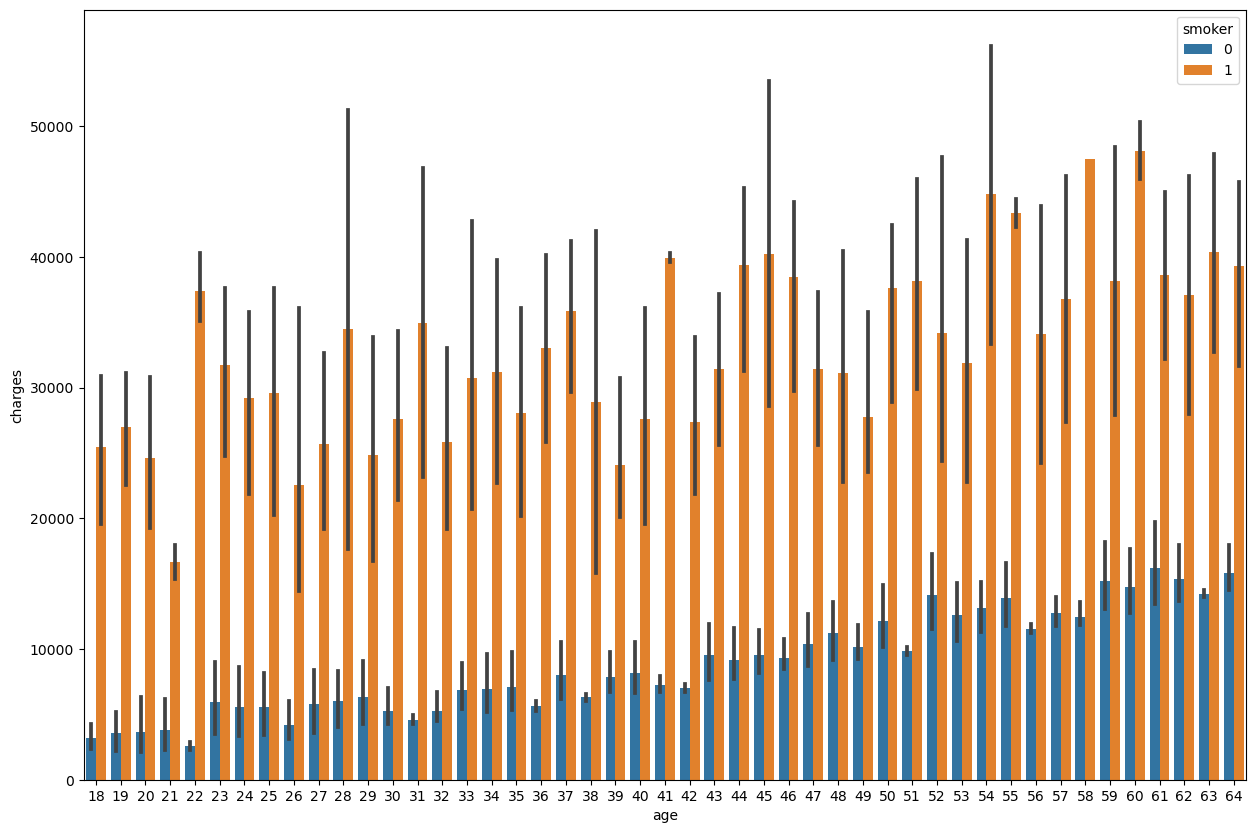

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sb.barplot(x='age', y='charges',hue="smoker",data=data)
plt.show()

In [ ]:
# Function to round down BMI to the nearest 5
def custom_round(x, base=5):
    return int(base * round(float(x)/base))

dataCopy = data.assign(bmi_bucket = data['bmi'].apply(lambda x: custom_round(x)),age_bucket = data['age'].apply(lambda x: custom_round(x)))

In [ ]:
dataCopy

,age,sex,bmi,children,smoker,region,charges,bmi_bucket,age_bucket
0,19,0,27.900,0,1,3,16884.92400,30,20
1,18,1,33.770,1,0,2,1725.55230,35,20
2,28,1,33.000,3,0,2,4449.46200,35,30
3,33,1,22.705,0,0,1,21984.47061,25,35
4,32,1,28.880,0,0,1,3866.85520,30,30
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,30,50
1334,18,0,31.920,0,0,0,2205.98080,30,20
1335,18,0,36.850,0,0,2,1629.83350,35,20
1336,21,0,25.800,0,0,3,2007.94500,25,20


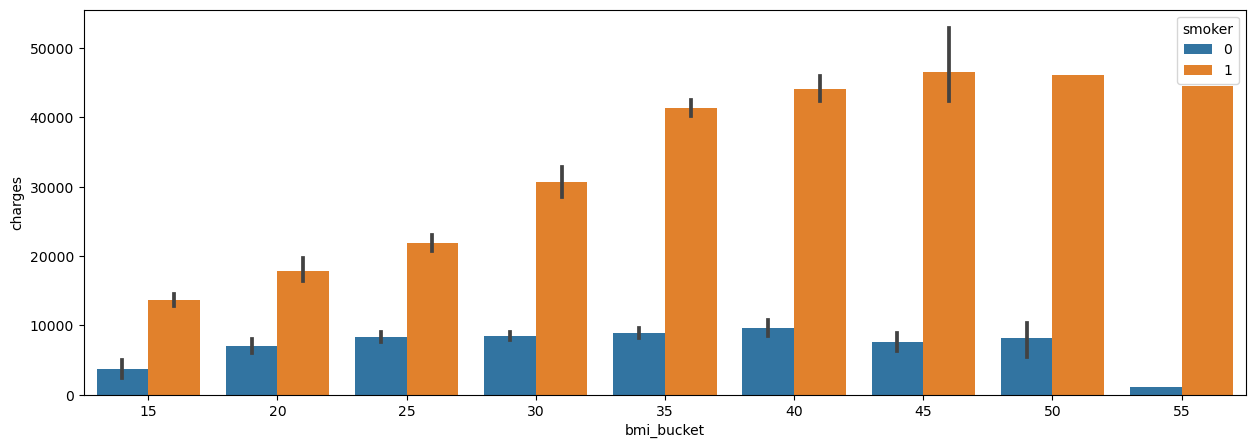

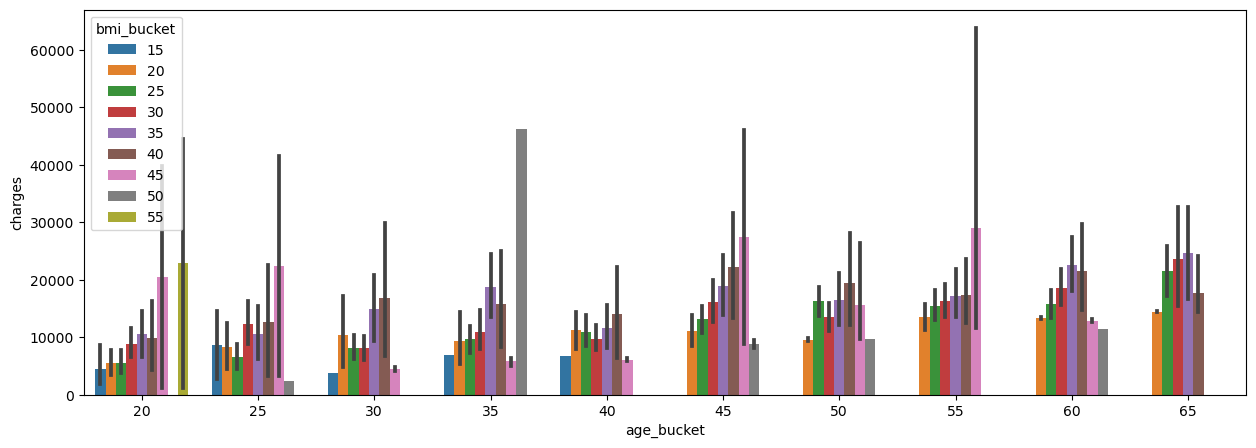

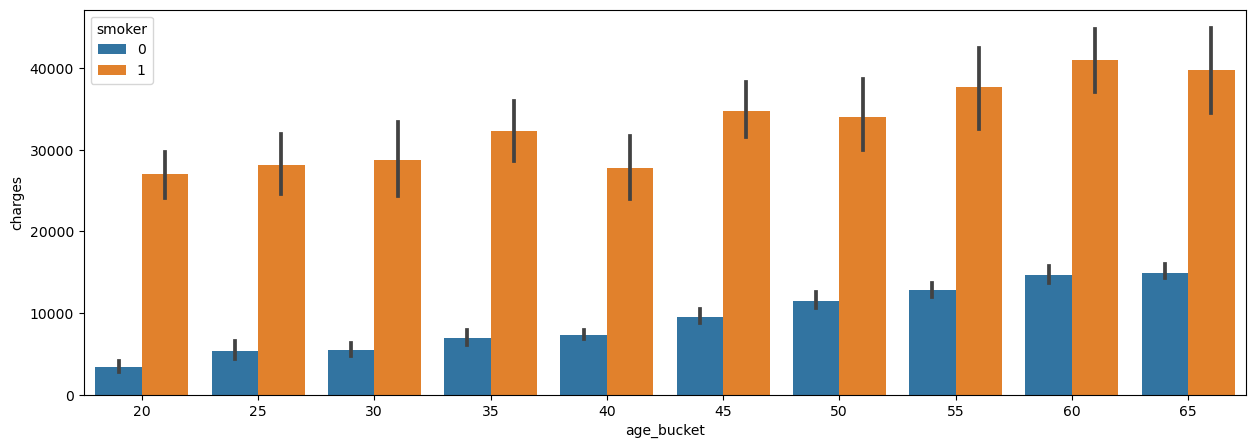

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sb.barplot(x='bmi_bucket', y='charges', hue="smoker", data=dataCopy)
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
sb.barplot(x='age_bucket', y='charges', hue="bmi_bucket", data=dataCopy)
plt.show()


fig, ax = plt.subplots(figsize=(15, 5))
sb.barplot(x='age_bucket', y='charges', hue="smoker", data=dataCopy)
plt.show()

**There is a definite contrast in the fees that smokers and non-smoker must pay.**

**Also, we can see that premium costs increase along with an individual's age.**

**From above we can conclude that those somke and do not maintain heaalthy weight are the ones who pay high charges.**

**Charges spike among who smoke as the BMI goes up, while among non-smokers it doesnt.**

*** ***
*** ***

**Smokers are unevenly distributed**

**Sex and region evenly distributed**

**Age and Childern are multimodal**

# Data Pre-processing and cleaning

### 1. Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore a few latest data balancing tasks and its effect on model evaluation parameters.

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**There are no null values in the dataset**

In [ ]:
data.shape, data[data['bmi']<45].shape


((1338, 7), (1318, 7))

**Only 20 data points will be lost, and the dataset will then be free of outliers.**

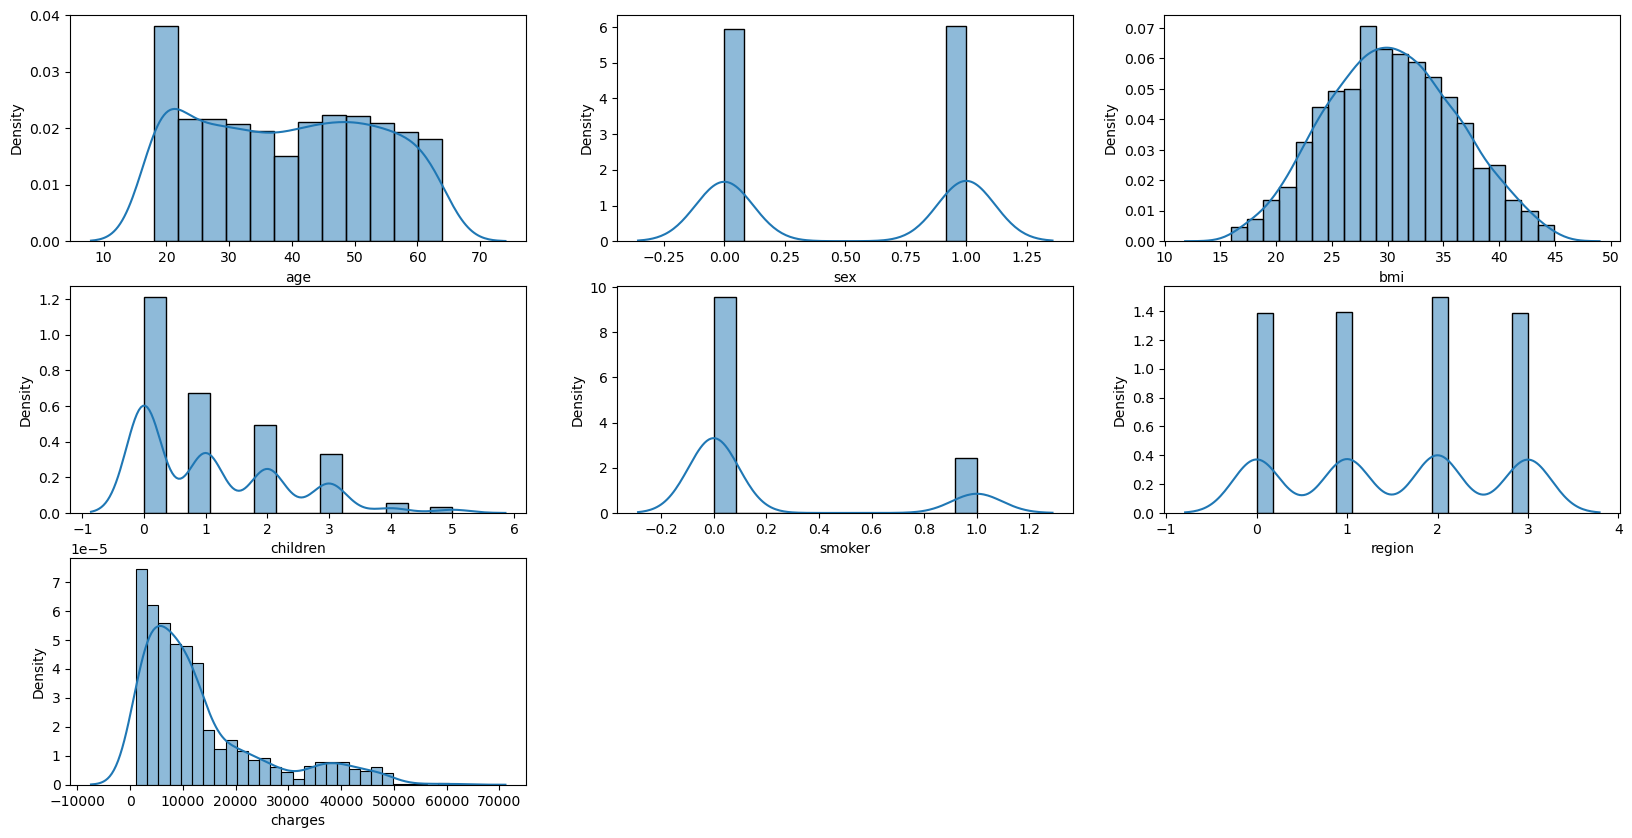

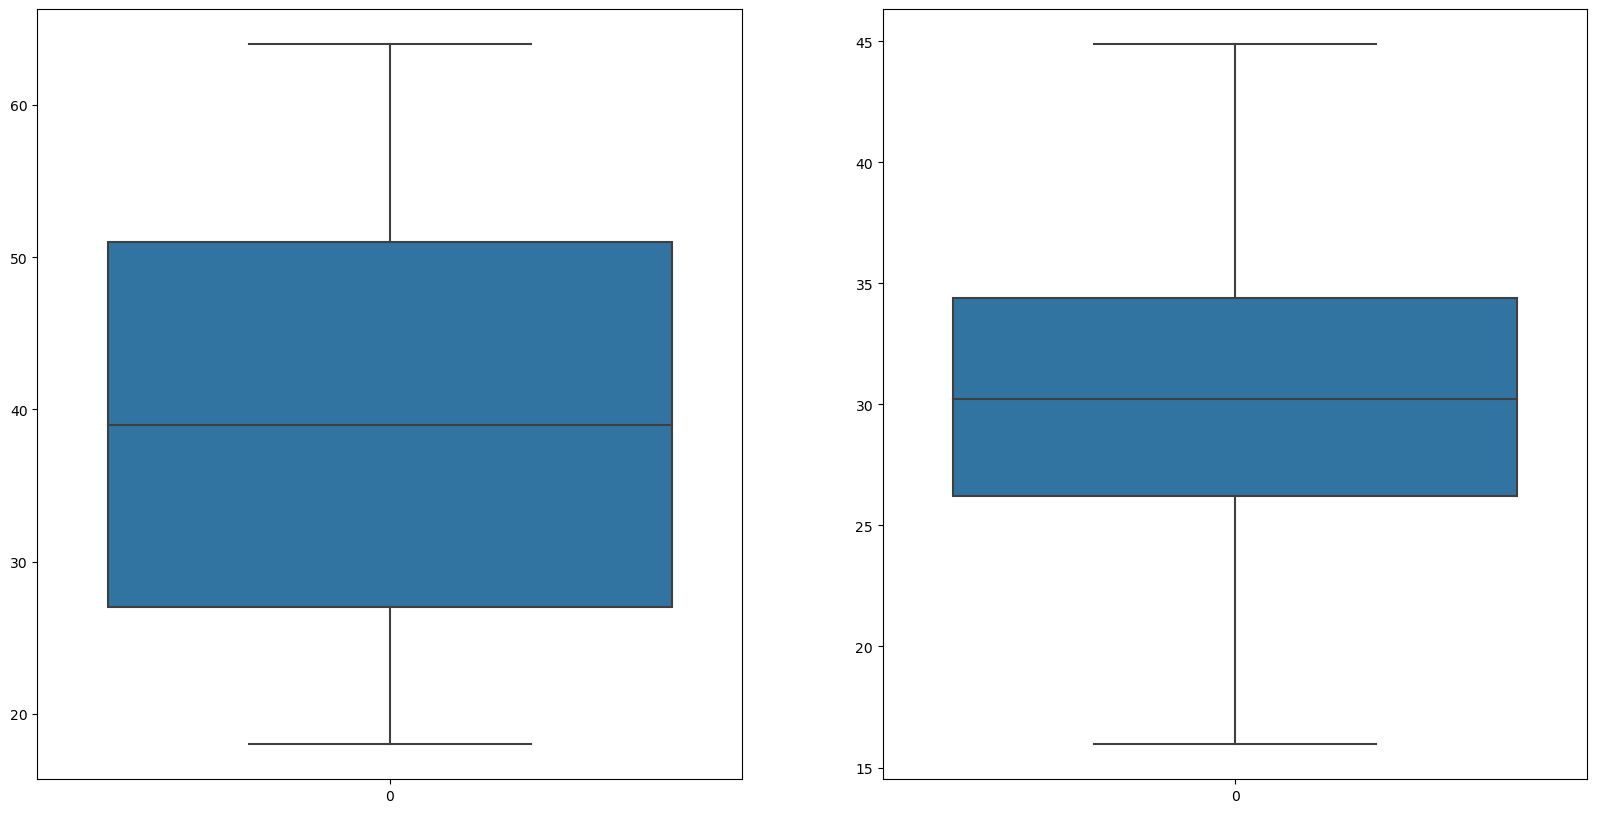

In [ ]:
data =data[data['bmi']<45]


features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(data.columns):
    plt.subplot(3,3,i+1)
    sb.histplot(data[col], stat='density', kde=True, kde_kws={"cut": 3})
plt.show()

features = ['age', 'bmi']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sb.boxplot(data[col])
plt.show()

**Removing BMI Outliers has no significat effect on data distribution**

** **
** **

### 2. Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon your dataset’s structure and complexity. Provide proper justification.

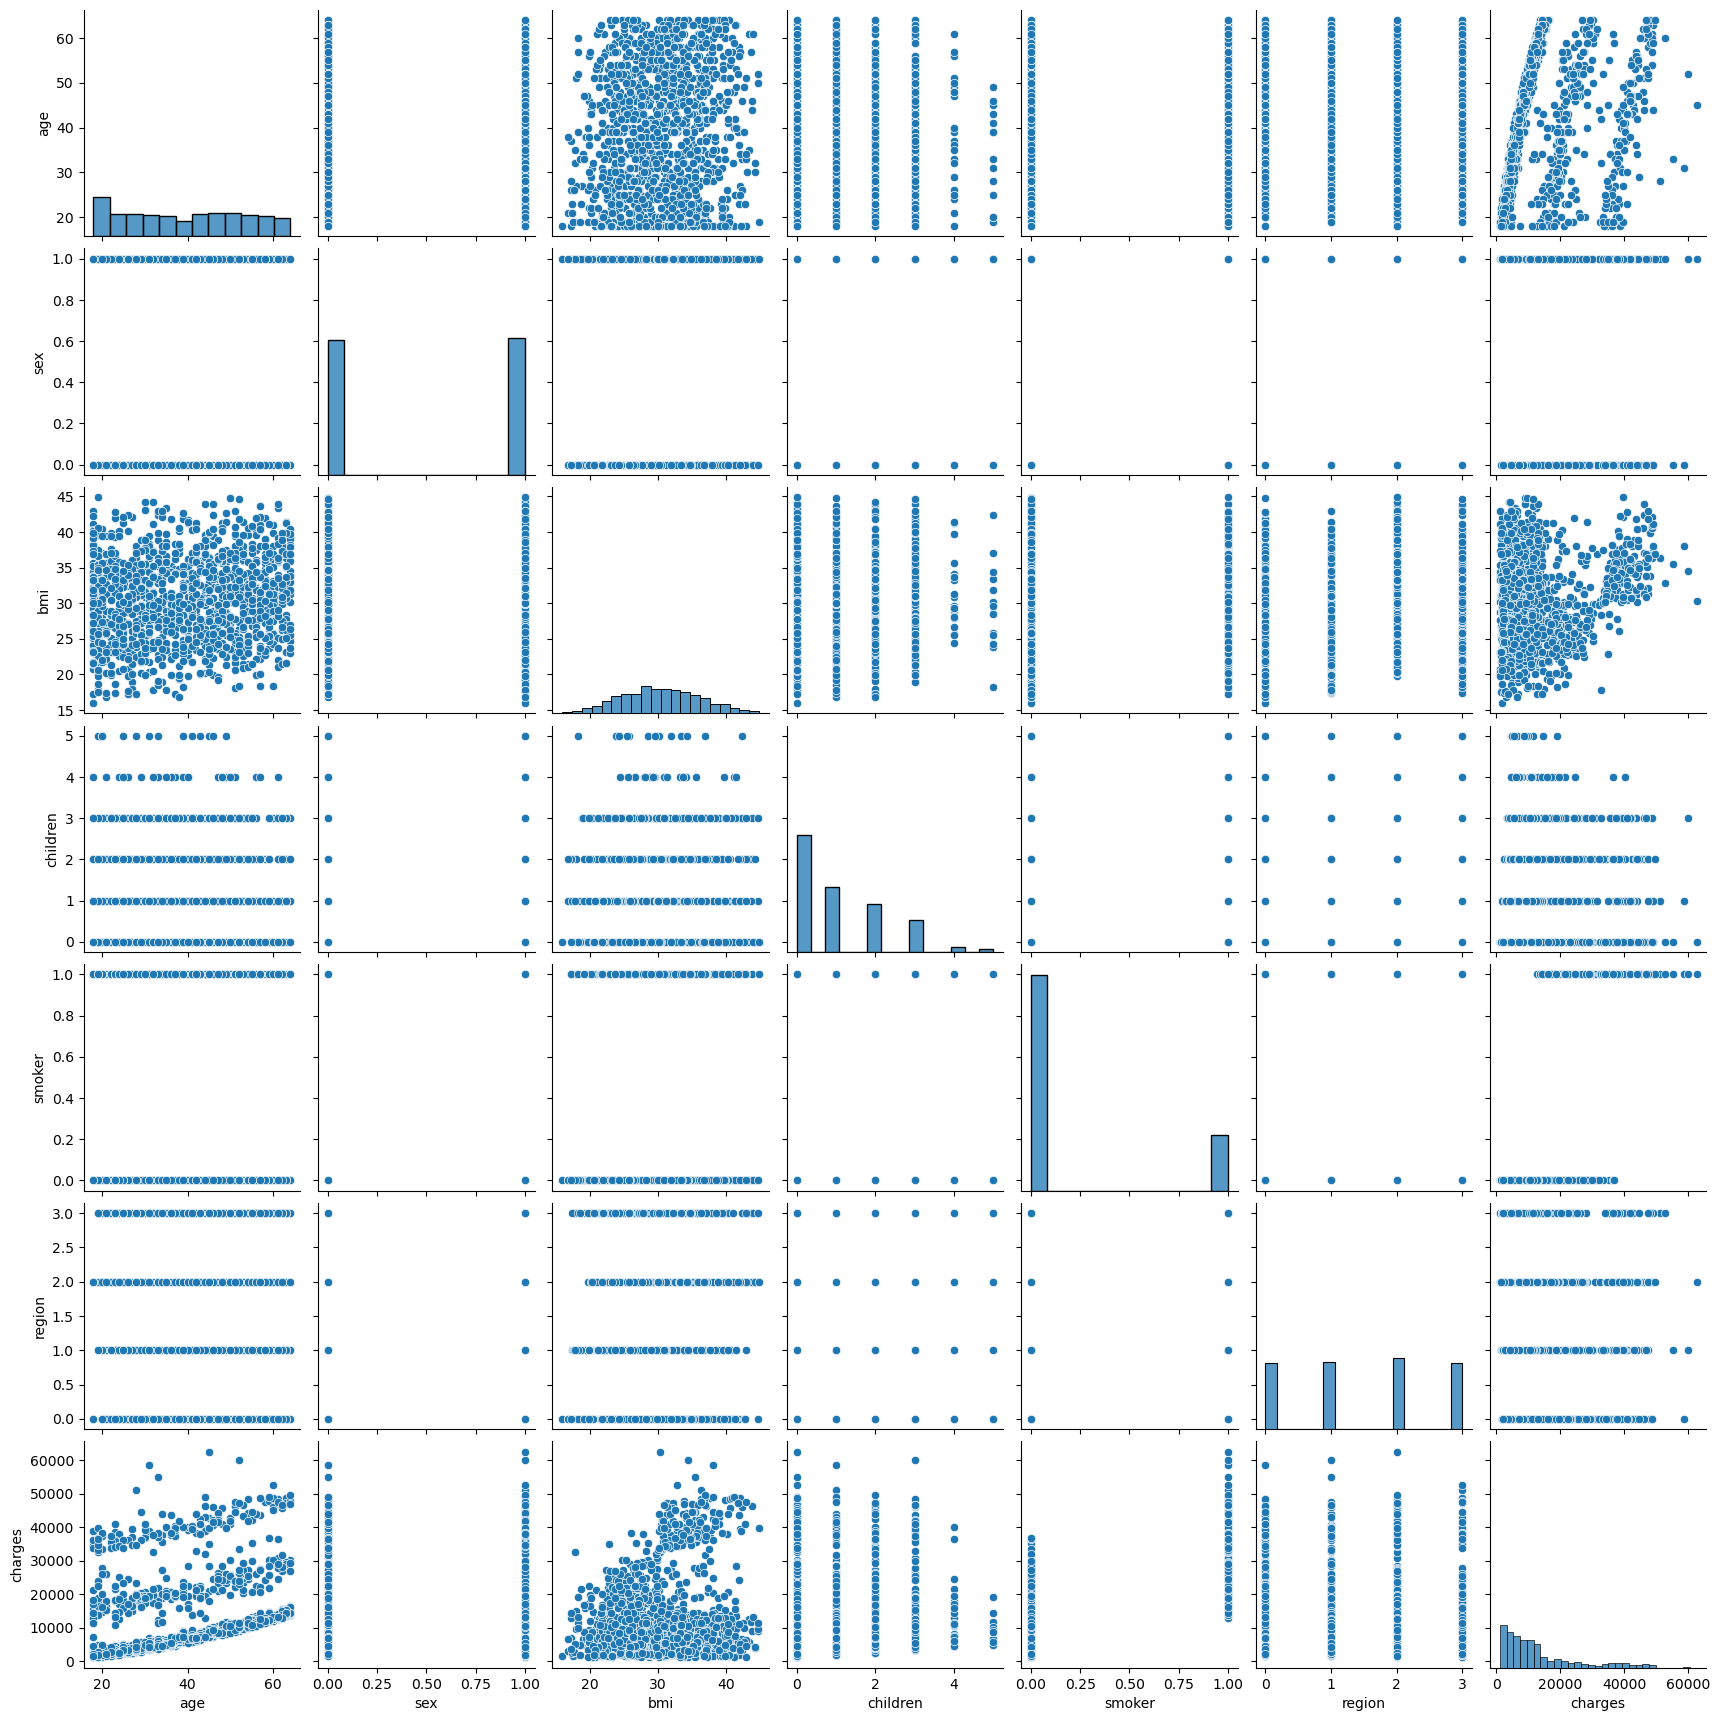

In [ ]:
sb.pairplot(data)

### Data Normalization and standardization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#dependent,independent variables
y = data.charges
x= data.drop(['charges'], axis=1)


In [ ]:
 y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
 x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


##### The Z score is a statistical measurement that illustrates how a value relates to the mean of a group of values.

In [ ]:
# Calculate the z-score from with scipy
import scipy.stats as stats
zscores = stats.zscore(data)
print(zscores)

           age       sex       bmi  children    smoker    region   charges
0    -1.435928 -1.007616 -0.434720 -0.904253  1.974748  1.346376  0.307388
1    -1.507001  0.992441  0.583094 -0.074305 -0.506394  0.444229 -0.959066
2    -0.796264  0.992441  0.449582  1.585591 -0.506394  0.444229 -0.731503
3    -0.440895  0.992441 -1.335493 -0.904253 -0.506394 -0.457918  0.733417
4    -0.511969  0.992441 -0.264795 -0.904253 -0.506394 -0.457918 -0.780176
...        ...       ...       ...       ...       ...       ...       ...
1333  0.767360  0.992441  0.097595  1.585591 -0.506394 -0.457918 -0.217626
1334 -1.507001 -1.007616  0.262318 -0.904253 -0.506394 -1.360066 -0.918929
1335 -1.507001 -1.007616  1.117143 -0.904253 -0.506394  0.444229 -0.967062
1336 -1.293780 -1.007616 -0.798844 -0.904253 -0.506394  1.346376 -0.935474
1337  1.549171 -1.007616 -0.231851 -0.904253  1.974748 -0.457918  1.331322

[1318 rows x 7 columns]


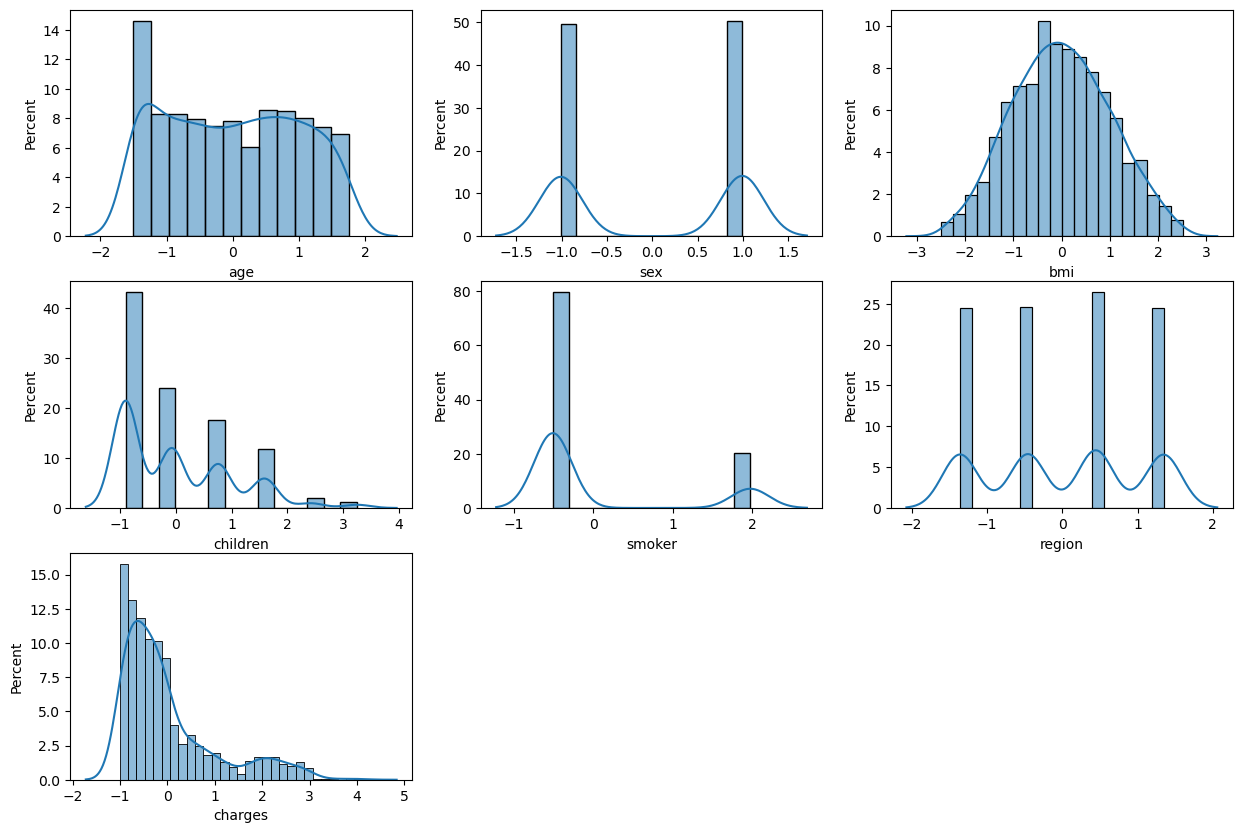

In [ ]:
plt.subplots(figsize=(15, 10))

for i, col in enumerate(zscores.columns):
    plt.subplot(3,3,i+1)
    sb.histplot(zscores[col], stat='percent', kde=True, kde_kws={"cut": 3})
plt.show()

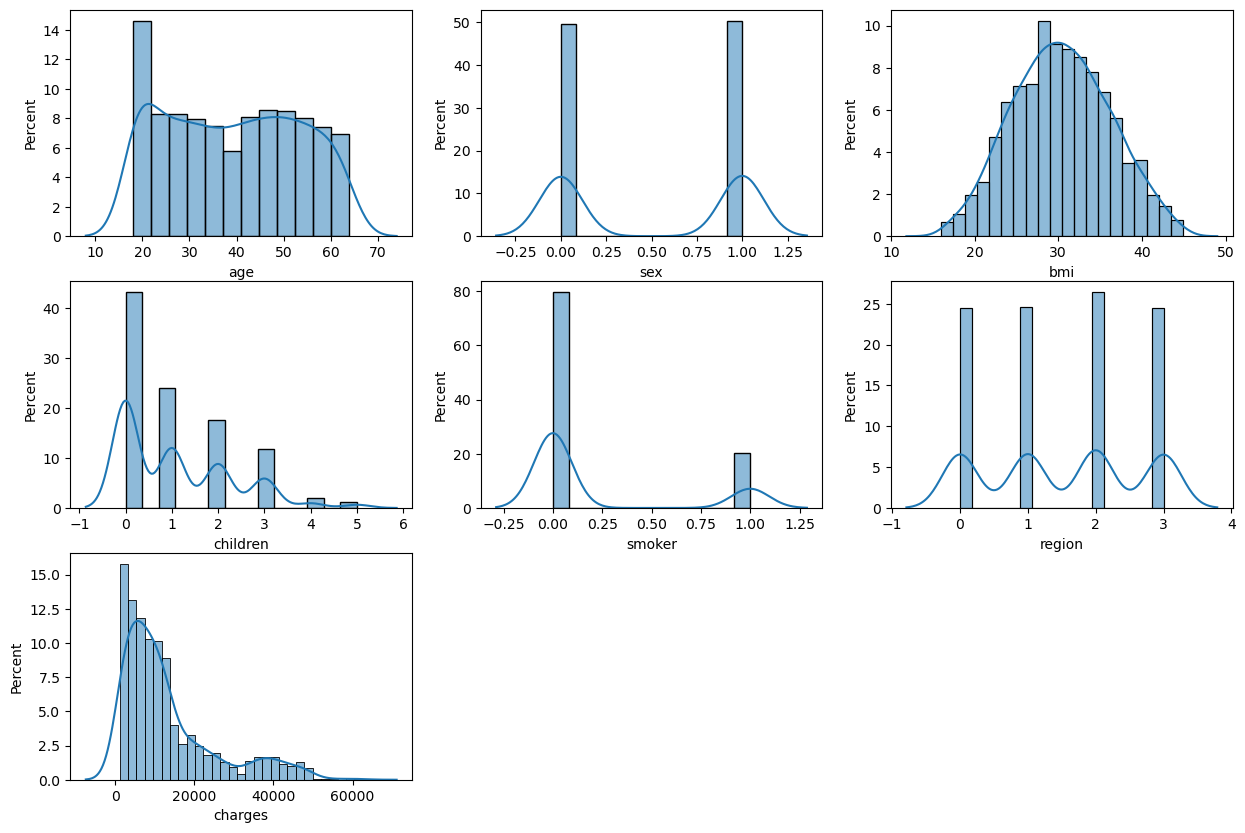

In [ ]:
#stat` must be one of ['count', 'frequency', 'density', 'probability', 'proportion', 'percent'], but average was passed.`

plt.subplots(figsize=(15, 10))

for i, col in enumerate(data.columns):
    plt.subplot(3,3,i+1)
    sb.histplot(data[col], stat='percent', kde=True, kde_kws={"cut": 3})
plt.show()

#### Those who pay the least charges are around 15% and those who pay high charges are 1%

# Model Building

### 1.	Definition of Algorithm 1 (Mention the Name of the algorithm here)
1. Split the dataset into training and test sets. Answers without justification will
not be awarded marks. [1 M]
Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ;
[ x_test1,y_test1] = 20% ;
Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ;
[ x_test2,y_test2] = 90%
2. Explore k-fold cross-validation. [1M]
3. Build Model/s using 1) Linear Regression [3M]
1. Do the prediction for the test data and display the results for the inference.
Calculate all the evaluation metrics and choose the best for your model. Justify
your answer. Answers must have justification to be awarded marks. [1M]


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
#decision tree
from sklearn.tree import DecisionTreeRegressor
#random forest
from sklearn.ensemble import RandomForestRegressor
#gradient boost
from sklearn import ensemble
#Accuracy
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from math import sqrt

In [ ]:
features = data.drop('charges', axis=1)
target = data['charges']

X_train, X_val,Y_train, Y_val = train_test_split(features, target,
								test_size=0.2,
								random_state=22)
X_train.shape, X_val.shape


((1054, 6), (264, 6))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
splits = kf.split(data)
for train_index, test_index in splits:
    print(len(train_index), len(test_index))

1054 264
1054 264
1054 264
1055 263
1055 263


In [ ]:
models = [LinearRegression(), RandomForestRegressor(), AdaBoostRegressor(),Lasso(), Ridge(),
          DecisionTreeRegressor(random_state = 0),
          ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 4,learning_rate = 0.01)]

mertics_80=[]

for i in range(7):
	models[i].fit(X_train, Y_train)
	#print(f'{models[i]} : ')
	# Predict    
	pred_train = models[i].predict(X_train)
	pred_val = models[i].predict(X_val)
	#print('Training Error : ', mape(Y_train, pred_train), ' Validation Error : ', mape(Y_val, pred_val))
	#Accuracy
	r2_test = r2_score(Y_val, pred_val)  
	mse_test  = mean_squared_error(Y_val, pred_val)
	rmse_test  = sqrt(mean_squared_error(Y_val, pred_val))
	mae_test  = mean_absolute_error(Y_val, pred_val)
	Kfold_values = cross_val_score(estimator=models[i], X=features, y=target, cv=5)
	mertics_80.append({'Model':type(models[i]).__name__,'Accuracy':r2_test,'Mean Squared Error':round(mse_test,2),'Root Mean Squared Error':rmse_test,
                       'Mean Absolute Error':mae_test,
                       'Training Error':mape(Y_train, pred_train),
                       'Validation Error':mape(Y_val, pred_val),
                       'Fold1':Kfold_values[0],
                       'Fold2':Kfold_values[1], 
                       'Fold3':Kfold_values[2], 
                       'Fold4':Kfold_values[3], 
                       'Fold5':Kfold_values[4] })
	#print('Accuracy : ',r2_test, ' Mean Squared Error : ',mse_test,' Root Mean Squared Error : ',rmse_test )
	#print('Mean Absolute Error : ',mae_test, ' KFold(5) Accuracy : ',cross_val_score(estimator=models[i], X=features, y=target, cv=5))
	#print()
metrics_DF_80=pd.DataFrame(mertics_80)
metrics_DF_80

,Model,Accuracy,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Training Error,Validation Error,Fold1,Fold2,Fold3,Fold4,Fold5
0,LinearRegression,0.764016,38570423.36,6210.509107,4407.779830,0.418881,0.450450,0.760346,0.714025,0.771236,0.730845,0.757411
1,RandomForestRegressor,0.868971,21416050.12,4627.747846,2389.207976,0.118822,0.251896,0.848422,0.775211,0.864064,0.820249,0.848782
2,AdaBoostRegressor,0.845678,25223160.03,5022.266424,3823.693825,0.550171,0.618259,0.826498,0.767009,0.797514,0.814010,0.848975
3,Lasso,0.764004,38572343.11,6210.663661,4407.781941,0.418842,0.450442,0.760365,0.714048,0.771215,0.730859,0.757407
4,Ridge,0.763952,38580949.22,6211.356472,4409.390562,0.419087,0.450821,0.760358,0.714379,0.770720,0.731215,0.757068
5,DecisionTreeRegressor,0.796498,33261423.66,5767.271769,2557.153873,0.004054,0.230328,0.692443,0.608538,0.638808,0.658792,0.670232
6,GradientBoostingRegressor,0.875828,20295240.08,4505.023871,2442.112573,0.250489,0.303747,0.876038,0.799649,0.887226,0.842939,0.862587


In [ ]:
# importing the modules
from tabulate import tabulate
# displaying the DataFrame
print(tabulate(metrics_DF_80, headers = 'keys', tablefmt = 'pretty'))

+---+---------------------------+--------------------+--------------------+-------------------------+---------------------+----------------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   |           Model           |      Accuracy      | Mean Squared Error | Root Mean Squared Error | Mean Absolute Error |    Training Error    |  Validation Error   |       Fold1        |       Fold2        |       Fold3        |       Fold4        |       Fold5        |
+---+---------------------------+--------------------+--------------------+-------------------------+---------------------+----------------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| 0 |     LinearRegression      | 0.7640159575421297 |    38570423.36     |    6210.509106746929    | 4407.7798296589835  |  0.4188805629224119  | 0.45044958781215905 | 0.7603458

** **
** **

### Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90%


In [ ]:
features = data.drop('charges', axis=1)
target = data['charges']

X_train, X_val,Y_train, Y_val = train_test_split(features, target,
								test_size=0.9,
								random_state=22)
X_train.shape, X_val.shape


((131, 6), (1187, 6))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
splits = kf.split(data)
for train_index, test_index in splits:
    print(len(train_index), len(test_index))

1054 264
1054 264
1054 264
1055 263
1055 263


In [ ]:
models = [LinearRegression(), RandomForestRegressor(), AdaBoostRegressor(),Lasso(), Ridge(),
          DecisionTreeRegressor(random_state = 0),
          ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 4,learning_rate = 0.01)]

mertics_10=[]

for i in range(7):
	models[i].fit(X_train, Y_train)
	#print(f'{models[i]} : ')
	# Predict    
	pred_train = models[i].predict(X_train)
	pred_val = models[i].predict(X_val)
	#print('Training Error : ', mape(Y_train, pred_train), ' Validation Error : ', mape(Y_val, pred_val))
	#Accuracy
	r2_test = r2_score(Y_val, pred_val)  
	mse_test  = mean_squared_error(Y_val, pred_val)
	rmse_test  = sqrt(mean_squared_error(Y_val, pred_val))
	mae_test  = mean_absolute_error(Y_val, pred_val)
	Kfold_values = cross_val_score(estimator=models[i], X=features, y=target, cv=5)
	mertics_10.append({'Model':type(models[i]).__name__,'Accuracy':r2_test,'Mean Squared Error':round(mse_test,2),'Root Mean Squared Error':rmse_test,
                       'Mean Absolute Error':mae_test,
                       'Training Error':mape(Y_train, pred_train),
                       'Validation Error':mape(Y_val, pred_val),
                       'Fold1':Kfold_values[0],
                       'Fold2':Kfold_values[1], 
                       'Fold3':Kfold_values[2], 
                       'Fold4':Kfold_values[3], 
                       'Fold5':Kfold_values[4] })
	#print('Accuracy : ',r2_test, ' Mean Squared Error : ',mse_test,' Root Mean Squared Error : ',rmse_test )
	#print('Mean Absolute Error : ',mae_test, ' KFold(5) Accuracy : ',cross_val_score(estimator=models[i], X=features, y=target, cv=5))
	#print(mertics_90)
	#print()
metrics_DF_10=pd.DataFrame(mertics_10)
metrics_DF_10


,Model,Accuracy,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Training Error,Validation Error,Fold1,Fold2,Fold3,Fold4,Fold5
0,LinearRegression,0.742765,37550151.33,6127.817828,4338.603762,0.406129,0.430496,0.760346,0.714025,0.771236,0.730845,0.757411
1,RandomForestRegressor,0.831506,24596073.26,4959.442838,2565.555480,0.115923,0.240514,0.851517,0.775224,0.859040,0.822452,0.850529
2,AdaBoostRegressor,0.745872,37096716.81,6090.707415,5193.494521,0.733015,0.848402,0.844066,0.796433,0.812660,0.805297,0.837001
3,Lasso,0.742772,37549222.56,6127.742044,4338.220397,0.406004,0.430395,0.760365,0.714048,0.771215,0.730859,0.757407
4,Ridge,0.742089,37648889.39,6135.869082,4344.213935,0.406108,0.430935,0.760358,0.714379,0.770720,0.731215,0.757068
5,DecisionTreeRegressor,0.775882,32715937.50,5719.784743,2742.924656,0.000000,0.228713,0.692443,0.608538,0.638808,0.658792,0.670232
6,GradientBoostingRegressor,0.819236,26387186.36,5136.845954,2704.023604,0.106666,0.278737,0.876080,0.799585,0.887240,0.842992,0.862608


In [ ]:
# importing the modules
from tabulate import tabulate
# displaying the DataFrame
print(tabulate(metrics_DF_10, headers = 'keys', tablefmt = 'pretty'))

+---+---------------------------+--------------------+--------------------+-------------------------+---------------------+---------------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   |           Model           |      Accuracy      | Mean Squared Error | Root Mean Squared Error | Mean Absolute Error |   Training Error    |  Validation Error   |       Fold1        |       Fold2        |       Fold3        |       Fold4        |       Fold5        |
+---+---------------------------+--------------------+--------------------+-------------------------+---------------------+---------------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| 0 |     LinearRegression      | 0.7427652970452554 |    37550151.33     |    6127.817827579442    |  4338.60376178018   | 0.40612903848335113 |  0.43049610442759   | 0.76034587316

**  **

**The Random Forest Regression,Gradient Boosting and Linear regression algorithms have accuracy in forecasting the cost of medical care. We also intend to test experiments using different machine learning models on the same data and compare the outcomes.**
**  **